In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

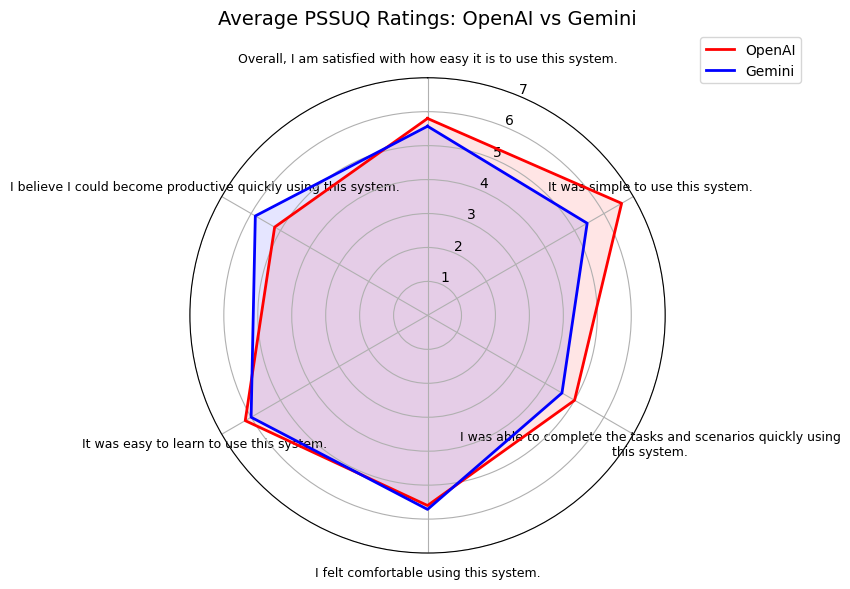

In [14]:
# Load data
df_pssuq = pd.read_csv('PSSUQ.csv')

llm_column = df_pssuq.columns[1]
question_columns = df_pssuq.columns[2:]

# Map to categories
df_pssuq['LLM'] = df_pssuq[llm_column].replace({
    'openai-direct': 'OpenAI',
    'openai-scaffolding': 'OpenAI',
    'openai-explanation': 'OpenAI',
    'gemini-direct': 'Gemini',
    'gemini-scaffolding': 'Gemini',
    'gemini-explanation': 'Gemini'
})

# Compute means
mean_scores = df_pssuq.groupby('LLM')[question_columns].mean()

# Prepare data for plotting
labels = question_columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels += [labels[0]]  # Close the loop
angles += [angles[0]]

# Data for each LLM
openai_scores = mean_scores.loc['OpenAI'].tolist() + [mean_scores.loc['OpenAI'][0]]
gemini_scores = mean_scores.loc['Gemini'].tolist() + [mean_scores.loc['Gemini'][0]]

# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

ax.plot(angles, openai_scores, color='red', linewidth=2, label='OpenAI')
ax.plot(angles, gemini_scores, color='blue', linewidth=2, label='Gemini')

ax.fill(angles, openai_scores, color='red', alpha=0.1)
ax.fill(angles, gemini_scores, color='blue', alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1], fontsize=9)
ax.set_ylim(0, 7)
ax.set_title("Average PSSUQ Ratings: OpenAI vs Gemini", fontsize=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()
